# LOAN PREDICTION PROJECT

<font size='4'> This personal project aims to predict the status of loan approval for a test dataset, given the training data.
    
The datasets were sourced online from here: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/</font>

In [1]:
%%HTML


<style>
td {
  font-size: 15px
}
</style>

### Variable Description:



| **Variable**        | **Description** |
| ------------- |:-------------:| 
| **Loan_ID**    | Unique Loan ID |
| **Gender**    | Male/ Female |
| **Married**    | Applicant married (Y/N) |
| **Dependents**    |  Number of dependents |
| **Education**    | Applicant Education (Graduate/ Under Graduate) |
| **Self_Employed**    | Self employed (Y/N |
| **ApplicantIncome**    | Applicant income |
| **CoapplicantIncome**    |  Coapplicant income |
| **LoanAmount**    | Loan amount in thousands |
| **Loan_Amount_Term**    |  Term of loan in months |
| **Credit_History**    | credit history meets guidelines |
| **Property_Area**    | Urban/ Semi Urban/ Rural |
| **Loan_Status**    |  Loan approved (Y/N) |
    

<font size='3'> I would begin by importing necessary libraries. </font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading in the training and testing dataset
df = pd.read_csv('loan_train.csv')

test_df = pd.read_csv('loan_test.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(df.shape)
print(test_df.shape)

(614, 13)
(367, 12)


## Exploratory Data Analysis

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [8]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [9]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<font size='3'>The next step is to check for and deal with missing values in both the training and testing dataset</font>

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<font size='3'>Filling categorical variables with the most occuring value</font>

In [12]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<font size='3'>Missing values for **Loan Amount** would be dropped in the training data and for the testing data, it would be filled with the mean value.</font>

In [15]:
df.dropna(axis=0, inplace=True)

test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [18]:
print(df.shape)
print(test_df.shape)

(592, 13)
(367, 12)


## Distrubution Analysis/Outlier Detection

<font size='3'>Distribution analysis checks the distribution of variables. The distribution for **Applicant Income** and **Loan Amount** would be reviewed.</font>

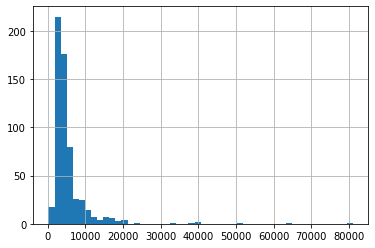

In [19]:
df['ApplicantIncome'].hist(bins=50)

<font size='3'>The histogram above shows the distribution for **Applicant Income** is right-skewed, with extreme values at the right side of the histogram.</font>

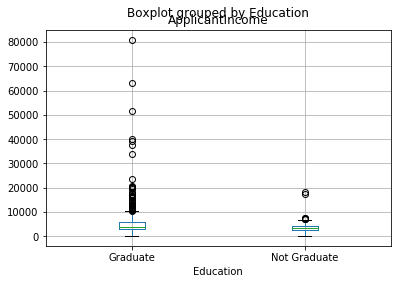

In [20]:
df.boxplot(column='ApplicantIncome', by='Education')

<font size='3'>The boxplot reveals that number of outliers for **Applicant Income** is higher for graduates. This could be because graudates are most likely to earn more than non-graduates.</font>

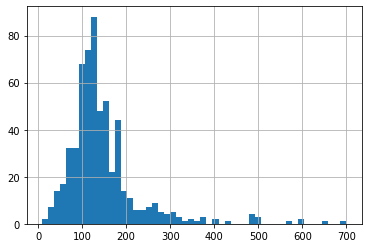

In [21]:
df['LoanAmount'].hist(bins=50)

<font size='3'>This histogram also shows the distribution for **Loan Amount** is right-skewed.</font>

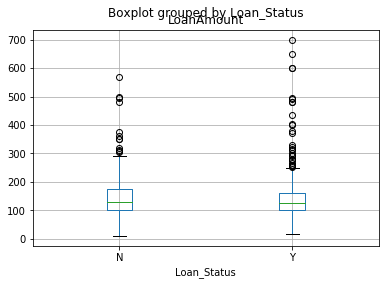

In [22]:
df.boxplot(column='LoanAmount', by='Loan_Status')

<font size='3'>The boxplot above makes it evident that there are more extreme **Loan Amount** values for those that have their Loan Status approved (depicted by 'Y').</font>

## Dealing with extreme values?

There are various methods to do this. I would be using the Log Transformation method which transforms the skewed variables.

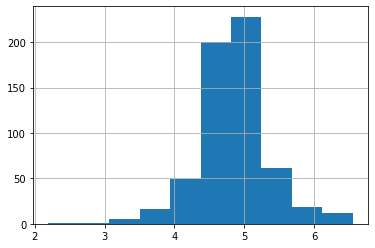

In [23]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

df['LoanAmount_log'].hist()

For the applicant income, I would be combining the applicant income with the coapplicant income before performing a log transformation.

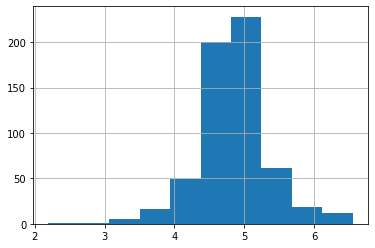

In [24]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['Total_Income'])

test_df['Total_Income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['TotalIncome_log'] = np.log(test_df['Total_Income'])

df['LoanAmount_log'].hist() 

In [25]:
#saving  to an excel file
df.to_excel("new_loan.xlsx")

I used the new loan excel file to make visualizations in Tableau. Here is the [link.](https://public.tableau.com/profile/chidera1611#!/vizhome/LoanPredictionProject/gender)

## Encoding Categorical Variables

In [26]:
df2=test_df.copy()

In [27]:
#dropping unnecessary columns
df.drop(columns=['Loan_ID','LoanAmount','Total_Income','ApplicantIncome','CoapplicantIncome'], inplace=True)
test_df.drop(columns=['Loan_ID','LoanAmount','Total_Income','ApplicantIncome','CoapplicantIncome'], inplace=True)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.948760,8.699515
5,Male,Yes,2,Graduate,Yes,360.0,1.0,Urban,Y,5.587249,9.170872


In [28]:
# encoding
from sklearn.preprocessing import LabelEncoder


variables = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
encoder = LabelEncoder()

for i in variables:
    df[i] = encoder.fit_transform(df[i])
    test_df[i] = encoder.fit_transform(test_df[i])

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
1,1,1,1,0,0,360.0,1.0,0,N,4.852030,8.714568
2,1,1,0,0,1,360.0,1.0,2,Y,4.189655,8.006368
3,1,1,0,1,0,360.0,1.0,2,Y,4.787492,8.505323
4,1,0,0,0,0,360.0,1.0,2,Y,4.948760,8.699515
5,1,1,2,0,1,360.0,1.0,2,Y,5.587249,9.170872


In [30]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [31]:
# scaling the X variable
from sklearn.preprocessing import MinMaxScaler

X_scaled = X.copy()
scaler = MinMaxScaler()

columns = ['LoanAmount_log','TotalIncome_log']
features = X_scaled[columns]
features = scaler.fit_transform(features.values)

X_scaled[columns] = features

In [32]:
#scaling the test data
test_data = test_df.copy()
scaler = MinMaxScaler()

columns = ['LoanAmount_log','TotalIncome_log']
features = test_data[columns]
features = scaler.fit_transform(features.values)

test_data[columns] = features

In [33]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [34]:
# Print the size of the train and test dataset
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(414, 10) (178, 10)
(414,) (178,)


## Modeling

In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [36]:
#function for accessing performance:
def classification_model(y_test, prediction, model, x_train, y_train):
    accuracy = accuracy_score(y_test,prediction)
    print ("Accuracy Score: %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    kf.split(x_train)    

    accuracy_model = []
    
    for train_index, test_index in kf.split(x_train):
            # Split train-test
            X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
            Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
            # Train the model
            model.fit(X_train, Y_train)
            # Append to accuracy_model the accuracy of the model
            accuracy_model.append(accuracy_score(Y_test, model.predict(X_test)))
    
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accuracy_model)))

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)

logmodel.fit(x_train, y_train)

prediction = logmodel.predict(x_test)

In [38]:
classification_model(y_test, prediction, logmodel, x_train, y_train)

Accuracy Score: 81.461%
Cross-Validation Score : 81.408%


### Feature Selection with RFE(Recursive Feature Elimination)

In [39]:
from sklearn.feature_selection import RFE

model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model, n_features_to_select = 5)
fit = rfe.fit(x_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False  True False  True False False  True False  True  True]
Feature Ranking: [4 1 5 1 3 6 1 2 1 1]


In [40]:
x_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
282,1,1,2,0,0,180.0,1.0,2,0.495994,0.204518
121,0,0,0,0,0,360.0,1.0,1,0.364496,0.263360


Selected features are: married, education, credit history and loan amonut log

In [41]:
x_tr = x_train.loc[:,['Married','Education','Credit_History','LoanAmount_log','TotalIncome_log']]
x_te = x_test.loc[:,['Married','Education','Credit_History','LoanAmount_log','TotalIncome_log']]

In [42]:

logmodel2 = LogisticRegression(solver='lbfgs', max_iter=1000)


logmodel2.fit(x_tr, y_train)

prediction2 = logmodel2.predict(x_te)

In [43]:
classification_model(y_test, prediction2, logmodel2, x_tr, y_train)

Accuracy Score: 81.461%
Cross-Validation Score : 81.408%


Accuracy didn't improve: number of features to be used wasn't determined

## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

With all variables

In [45]:
dec_tree = DecisionTreeClassifier()

dec_tree.fit(x_train, y_train)

prediction3 = dec_tree.predict(x_test)

In [46]:
classification_model(y_test, prediction3, dec_tree, x_train, y_train)

Accuracy Score: 71.348%
Cross-Validation Score : 70.047%


With selected variables

In [47]:
from sklearn.feature_selection import RFE

model = DecisionTreeClassifier()
rfe2 = RFE(model, n_features_to_select = 5)
fit = rfe2.fit(x_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False False False  True  True  True  True  True]
Feature Ranking: [6 4 2 5 3 1 1 1 1 1]


In [48]:
x_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
282,1,1,2,0,0,180.0,1.0,2,0.495994,0.204518
121,0,0,0,0,0,360.0,1.0,1,0.364496,0.263360


Selected features are: credit history, property area, loan amount, and total income

In [49]:
x_tr = x_train.loc[:,['Dependents','Loan_Amount_Term','Credit_History','LoanAmount_log','TotalIncome_log']]
x_te = x_test.loc[:,['Dependents','Loan_Amount_Term','Credit_History','LoanAmount_log','TotalIncome_log']]

In [50]:
dec_tree2 = DecisionTreeClassifier()


dec_tree2.fit(x_tr, y_train)

prediction4 = dec_tree2.predict(x_te)

In [51]:
classification_model(y_test, prediction4, dec_tree2, x_tr, y_train)

Accuracy Score: 74.719%
Cross-Validation Score : 71.252%


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

prediction5 = rf.predict(x_test)

classification_model(y_test, prediction5, rf, x_train, y_train)

Accuracy Score: 79.213%
Cross-Validation Score : 78.016%


<font size='3'>This gives a slightly better accuracy.</font>

### Feature Importance

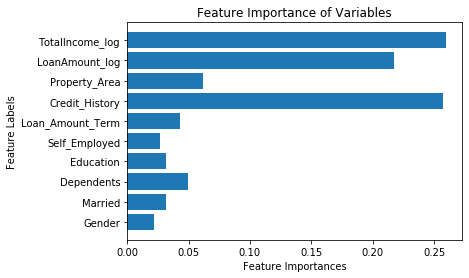

In [54]:
feature_importances = rf.feature_importances_ 

plt.barh(x_train.columns, feature_importances)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.title('Feature Importance of Variables')
plt.show()

This identifies the top 5 variables as total income, credit history, loan amount, property area and dependents

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

print(hyperparameter_grid)


rf_random = RandomizedSearchCV(rf,hyperparameter_grid, random_state=1,cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1)
# Fit the random search model
rf_random.fit(x_train, y_train)

{'n_estimators': [50, 100, 300, 500, 1000], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 3, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2', None]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [69]:
print(f'best param of the ExtraTreeClassifier is: {rf_random.best_params_}')

best param of the ExtraTreeClassifier is: {'n_estimators': 1000, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'sqrt'}


In [58]:
print(f'best score is: {rf_random.best_score_}')

best score is: 0.8140170437848958


In [59]:
rf2 = RandomForestClassifier(n_estimators = 1000, min_samples_split = 9, min_samples_leaf = 8, 
                             max_features = 'sqrt', random_state = 1)

rf2.fit(x_train, y_train)

pred = rf2.predict(x_test)

In [60]:
classification_model(y_test, pred, rf2, x_train, y_train)

Accuracy Score: 81.461%
Cross-Validation Score : 81.408%


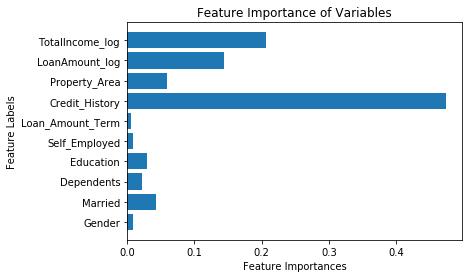

In [61]:
feature_importance = rf2.feature_importances_ 

plt.barh(x_train.columns, feature_importance)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.title('Feature Importance of Variables')
plt.show()

<font size='3'> Using a more sophisticated model doesn't guarantee a better result. The improved random forest and logistic regression models gave the same results. </font>

<font size='3'>Predicting on the test set...</font>

In [62]:
test_prediction = rf2.predict(test_data)

In [63]:
df2.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581


In [64]:
# making prediction into a dataframe
test_prediction = pd.DataFrame(test_prediction, columns=['Loan_Status'])
test_prediction.head()

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y


In [65]:
test_prediction['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [66]:
dataframes = [df2["Loan_ID"], test_prediction['Loan_Status']]

headers = ["Loan_ID", "Loan_Status"]

solution = pd.concat(dataframes, axis=1, keys=headers)

In [67]:
solution.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [68]:
#saving the prediction to an excel file
solution.to_excel("solution.xlsx")